This notebook explores different choices in the MLDP mask
1. no mask (resmask=0)
2. mask with 2000m resolution (resmask=2000)
3. mask with 100m resolution (resmask=100)

In [1]:
import glob
import os

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import seawater as sw
import xarray as xr

%matplotlib inline

In [2]:
data_dir='/home/soontiensn/data/gpsc-work2/'
masks = {'nomask': 'test-mldp-larger_0',
         'resmask2000': 'test-mldp-larger_2000',
         'resmask100': 'test-mldp-larger_100'}
datasets={}
for m in masks:
    f=glob.glob(os.path.join(data_dir, masks[m], 'driftmap_results', 'output', '*.nc'))[0]
    datasets[m] = xr.open_dataset(f)

In [3]:
def calculate_distance(d1, d2):
    times = d1.time
    dist = np.zeros((d1.mod_lon.shape[0],len(times)))
    for n, d in enumerate(times):
        d1_sel = d1.isel(time=n)
        d2_sel = d2.isel(time=n)
        for p in range(dist.shape[0]):
            lat = np.array([d1_sel.mod_lat.values[p], d2_sel.mod_lat.values[p]])
            lon = np.array([d1_sel.mod_lon.values[p], d2_sel.mod_lon.values[p]])
            dist[p, n] = sw.dist(lat,lon)[0] # distance defualts in km
    return dist

In [4]:
def plot_tracks(lon1, lat1, lon2, lat2, ax, label1, label2):
    min_lon = np.min([np.nanmin(lon1), np.nanmin(lon2)])
    min_lat = np.min([np.nanmin(lat1), np.nanmin(lat2)])
    max_lon = np.max([np.nanmax(lon1), np.nanmax(lon2)])
    max_lat = np.max([np.nanmax(lat1), np.nanmax(lat2)])
    m = Basemap(projection='merc',
                llcrnrlat=min_lat-.1,urcrnrlat=max_lat+.1,
                llcrnrlon=min_lon-.1,urcrnrlon=max_lon+.1,resolution='i')
    x1,y1 = m(lon1, lat1)
    x2,y2 = m(lon2, lat2)
    m.plot(x1,y1,'-.', label=label1)
    m.plot(x2,y2,'-.', label=label2)
    m.drawcoastlines()
    m.fillcontinents()

# No mask vs Resmask2000

In [5]:

run1, run2='nomask', 'resmask2000'
d1, d2 = datasets[run1], datasets[run2]
dist = calculate_distance(d1, d2)
print(np.nanmax(dist))

4.912391273332515


In [6]:
inds = np.where(np.logical_and(dist!=0, ~np.isnan(dist)))
drifters = np.unique(inds[0])

/home/soontiensn/miniconda/envs/analysis/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  
/home/soontiensn/miniconda/envs/analysis/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  
/home/soontiensn/miniconda/envs/analysis/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  
/home/soontiensn/miniconda/envs/analysis/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  
/home/soontiensn/miniconda/envs/analysis/lib

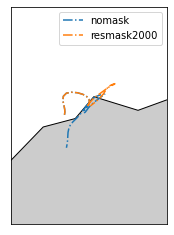

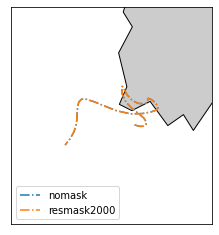

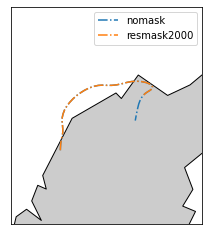

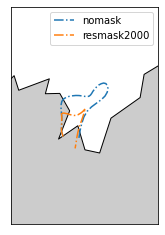

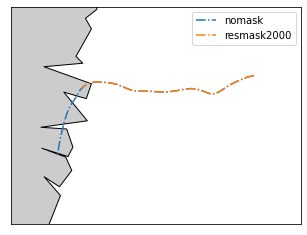

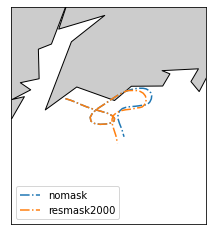

In [7]:
start_land=[]
for d in drifters:
    if np.isnan(dist[d,1]): # drifter started on land
        start_land.append(d)
        continue
    fig, ax = plt.subplots(1,1)
    plot_tracks(d1.mod_lon.values[d,:], d1.mod_lat.values[d,:],
                d2.mod_lon.values[d,:], d2.mod_lat.values[d,:], ax, run1, run2)
    ax.legend()

# Resmask 100 vs Resmask2000

In [8]:

run1, run2='resmask100', 'resmask2000'
d1, d2 = datasets[run1], datasets[run2]
dist = calculate_distance(d1, d2)
print(np.nanmax(dist))

11.024522997811381


In [9]:
inds = np.where(np.logical_and(dist!=0, ~np.isnan(dist)))
drifters = np.unique(inds[0])

/home/soontiensn/miniconda/envs/analysis/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  
/home/soontiensn/miniconda/envs/analysis/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  
/home/soontiensn/miniconda/envs/analysis/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  
/home/soontiensn/miniconda/envs/analysis/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  
/home/soontiensn/miniconda/envs/analysis/lib

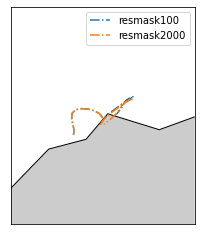

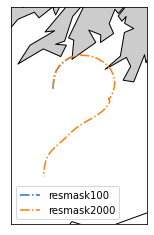

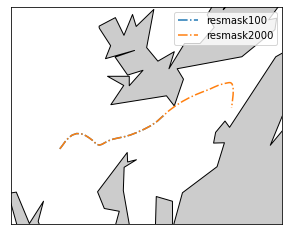

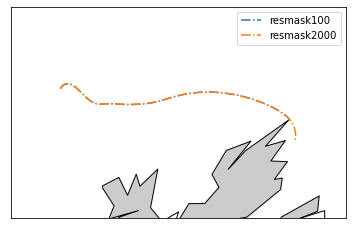

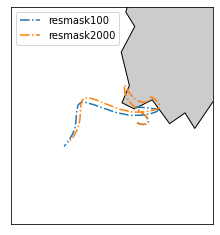

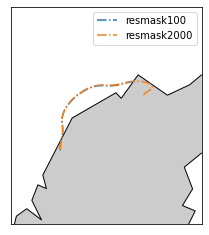

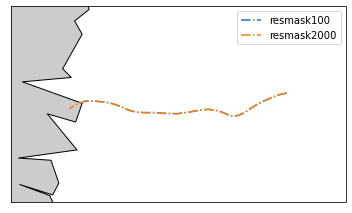

In [10]:
start_land=[]
for d in drifters:
    if np.isnan(dist[d,1]): # drifter started on land
        start_land.append(d)
        continue
    fig, ax = plt.subplots(1,1)
    plot_tracks(d1.mod_lon.values[d,:], d1.mod_lat.values[d,:],
                d2.mod_lon.values[d,:], d2.mod_lat.values[d,:], ax, run1, run2)
    ax.legend()